In [2]:
import pandas as pd

df_punt_1 = pd.read_csv("metingen/kleine_kamer_punt_1_180Hz.csv", delimiter=",")
df_punt_2 = pd.read_csv("metingen/kleine_kamer_punt_2_180Hz.csv", delimiter=",")
df_punt_3 = pd.read_csv("metingen/kleine_kamer_punt_3_180Hz.csv", delimiter=",")
df_punt_4 = pd.read_csv("metingen/kleine_kamer_punt_4_180Hz.csv", delimiter=",")

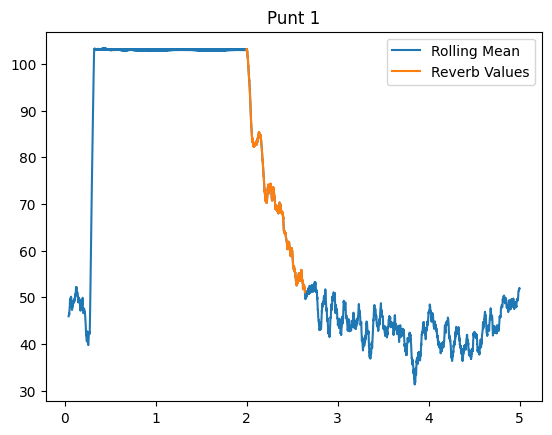

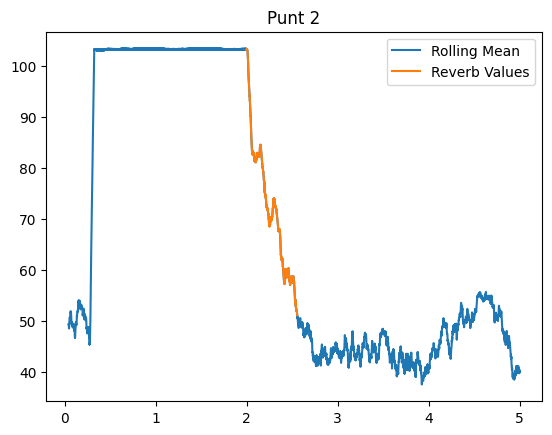

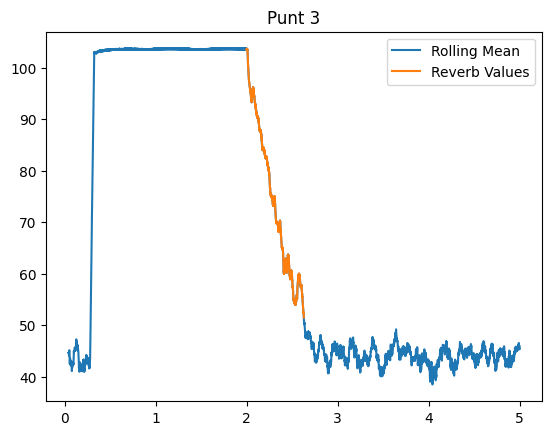

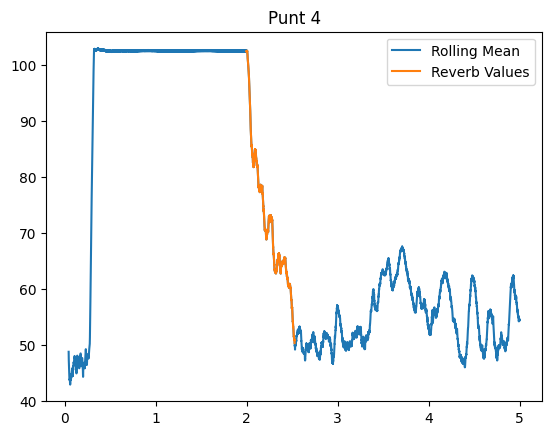

In [3]:
import matplotlib.pyplot as plt

sound_stop_index = 2 * 44100

def rolling_mean(decibels):
    return decibels.rolling(window=2000).mean()

def get_reverb_time(df):
    # Rolling mean of dB array
    _decibel_array = rolling_mean(df['Decibels'])
    _time_stamps = df['Time']
    # Find the maximum sound level in the decibel array
    sound_level_before_drop = _decibel_array[sound_stop_index]

    # Find the index of the first data point where the sound level is 60 dB below the maximum sound level
    _decay_point_index = np.argmax((_decibel_array <= sound_level_before_drop - 52) & (_time_stamps > _time_stamps[sound_stop_index]))

    # Calculate the time it takes for the sound level to decay by 60 dB
    _reverb_time = _time_stamps[_decay_point_index] - _time_stamps[sound_stop_index]

    return _reverb_time, _decay_point_index

reverb_time_point_1, decay_point_index_point_1 = get_reverb_time(df_punt_1)
reverb_time_point_2, decay_point_index_point_2 = get_reverb_time(df_punt_2)
reverb_time_point_3, decay_point_index_point_3 = get_reverb_time(df_punt_3)
reverb_time_point_4, decay_point_index_point_4 = get_reverb_time(df_punt_4)

reverb_values = [[df_punt_1, reverb_time_point_1, decay_point_index_point_1], [df_punt_2, reverb_time_point_2, decay_point_index_point_2], [df_punt_3, reverb_time_point_3, decay_point_index_point_3], [df_punt_4, reverb_time_point_4, decay_point_index_point_4]]

for i in range(len(reverb_values)):
    df = reverb_values[i][0]
    reverb_time = reverb_values[i][1]
    decay_point_index = reverb_values[i][2]

    plt.plot(df['Time'], rolling_mean(df['Decibels']), label='Rolling Mean')

    # Select the rows in the DataFrame that fall within the time range
    time_range_data = df.loc[(df['Time'].index >= sound_stop_index) & (df['Time'].index <= decay_point_index)]

    # Extract the time and decibel values into separate arrays
    time_range_times = time_range_data['Time'].values
    time_range_decibels = time_range_data['Rolling Mean'].values

    plt.plot(time_range_times, time_range_decibels, label='Reverb Values')
    plt.title('Punt ' + str(i+1))
    plt.legend()
    plt.show()

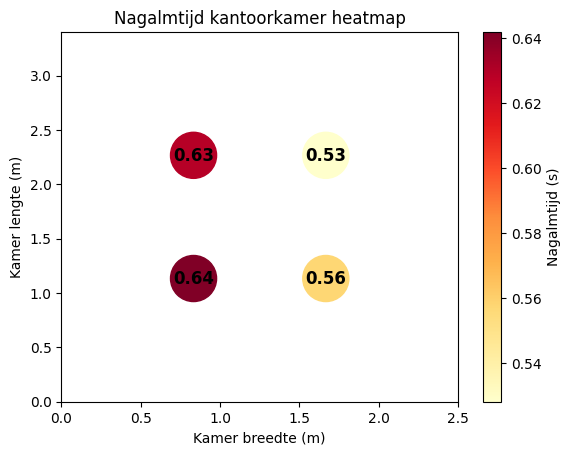

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the room
room_length = 3.4 # in meters
room_width = 2.5 # in meters

# Define the coordinates of the 4 points in the room
point_1 = (room_width/3, room_length/3)
point_2 = (2*room_width/3, room_length/3)
point_3 = (room_width/3, 2*room_length/3)
point_4 = (2*room_width/3, 2*room_length/3)

# Define the X-axis values for the heatmap
x_values = [point_1[0], point_2[0], point_3[0], point_4[0]]

# Define the values for the heatmap
# In this example, the values represent temperature at each point in the room
heatmap_values = np.array([reverb_time_point_1, reverb_time_point_2, reverb_time_point_3, reverb_time_point_4])

# Create the heatmap using Matplotlib's scatter() function
fig, ax = plt.subplots()
im = ax.scatter(x_values,
                [point_1[1], point_2[1], point_3[1], point_4[1]],
                c=heatmap_values, cmap='YlOrRd', s=1100)

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Nagalmtijd (s)')

# Set the X and Y axis labels for the heatmap
ax.set_xlabel('Kamer breedte (m)')
ax.set_ylabel('Kamer lengte (m)')

# Room limits
ax.set_xlim(0, room_width)
ax.set_ylim(0, room_length)

# Set the title of the heatmap
ax.set_title("Nagalmtijd kantoorkamer heatmap")

# Add text annotations for each point
for i, value in enumerate(heatmap_values):
    ax.text(x_values[i], [point_1[1], point_2[1], point_3[1], point_4[1]][i], round(value, 2),
            ha='center', va='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()
